In [2]:
# Read the csv file in 
import csv 
file = []
with open("./data/V08/Test.csv", encoding='iso-8859-1') as csvfile: 
	reader = csv.DictReader(csvfile, delimiter=";", dialect='excel')
	for line in reader: 
		file.append(line)

In [3]:
file[0]

{'Zeitstempel': '',
 'Eintragstyp': 'Entnahmegrund: ',
 'Eintragstext': 'Routinemï¿½ï¿½ige Logbuchentnahme.  ',
 'Betriebsstunden ABC-Anlage [h]': '',
 'Warnton taktisch': '',
 'Warnton technisch': '',
 'Batteriegesamtspannung [V]': '',
 'Batteriespannung Strang 1-2 [V]': '',
 'Batteriespannung Strang 3-4 [V]': '',
 'Batteriespannung Strang 5-6 [V]': '',
 'Batteriespannung Strang 7-8 [V]': '',
 'Betriebsart': '',
 'Einzelprï¿½fung Fehlerstatus': '',
 'Ganglage (Ist)': '',
 'Ganglage (Soll)': '',
 'Gesamtkilometer [km]': '',
 'Geschwindigkeit [km/h]': '',
 'HS Fg/BAW Turm': '',
 'Kampfschalter': '',
 'Kettenkilometer [km]': '',
 'Knotenfehlernummer': '',
 'Motorstatus': '',
 'Motordrehzahl [U/min]': '',
 'Not': '',
 'Seriennummer': '',
 'Hauptnummer': '',
 'Nebennummer': '',
 'Knoten ID': ''}

In [4]:
from datetime import datetime
time = datetime.strptime(file[2352]["Zeitstempel"], "%d.%m.%Y %H:%M:%S")
print(time)

2021-03-03 06:57:40


# Find the corresponiding setting for each time 
The goal now is it to find the settings like the gear and the view in the input given time. For now, I will simulate the input with a simple constant. 

In [5]:
input_time = "03.03.2021 06:30:00"
input_time = datetime.strptime(input_time, "%d.%m.%Y %H:%M:%S")
# Iterate over the lines and find the line 
last_time = None

for line in file: 
	timestamp = line["Zeitstempel"].replace("(", "").replace(")", "")
	if not timestamp == "":
		time = datetime.strptime(timestamp, "%d.%m.%Y %H:%M:%S")
		if not last_time is None and time > input_time: 
			break
		else: 
			last_time = time

In [6]:
# Testing for the datetime 
now = datetime.now()
now == now

True

In [7]:
import pandas as pd
input_time = "2021-03-03 06:57:00"
data = pd.read_csv("data/V08/Test.csv", delimiter=";")
data = data.drop(columns=["Betriebsstunden ABC-Anlage [h]", "Batteriegesamtspannung [V]", "Batteriespannung Strang 1-2 [V]", "Batteriespannung Strang 5-6 [V]", "Batteriespannung Strang 3-4 [V]", "Batteriespannung Strang 7-8 [V]", "Seriennummer", "Hauptnummer", "Nebennummer", "Knoten ID"])
data["Zeitstempel"] = data["Zeitstempel"].str.replace("[\(\)]", "", regex=True)
data["Motorstatus"] = data["Motorstatus"].str.encode("ascii", "ignore").str.decode(encoding="ascii")
data["Zeitstempel"] = pd.to_datetime(data["Zeitstempel"], format="%d.%m.%Y %H:%M:%S")
data.shape

(3562, 18)

In [8]:
filtered_df = data.query("Zeitstempel <= '" + input_time + "'")
filtered_df.tail()


,Zeitstempel,Eintragstyp,Eintragstext,Warnton taktisch,Warnton technisch,Betriebsart,Einzelpr�fung Fehlerstatus,Ganglage (Ist),Ganglage (Soll),Gesamtkilometer [km],Geschwindigkeit [km/h],HS Fg/BAW Turm,Kampfschalter,Kettenkilometer [km],Knotenfehlernummer,Motorstatus,Motordrehzahl [U/min],Not
2347,2021-03-03 06:54:40,MSTA,Motorstatus,NaN,NaN,F�,NaN,N,N,150.0,0.0,2 / Beobachten,aus,150.0,NaN,luft,1332.0,NaN
2348,2021-03-03 06:54:43,WR,018001 Sammelalarm Getriebedrucksystem Nicht f...,0.0,0.0,F�,NaN,N,N,150.0,0.0,2 / Beobachten,aus,150.0,1.0,luft,1324.0,NaN
2349,2021-03-03 06:54:59,W,"018016 Warmfahren abgebrochen, Automatikmodus ...",0.0,0.0,F�,NaN,3.V,AV,150.0,0.0,2 / Beobachten,aus,150.0,14.0,luft,1323.0,NaN
2350,2021-03-03 06:55:41,BSTWL,Spannung 60 s nach TwStart,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2351,2021-03-03 06:56:40,idle,StandardEintrag,NaN,NaN,F�,NaN,3.V,AV,150.0,21.0,2 / Beobachten,aus,150.0,NaN,luft,4044.0,NaN


In [9]:
# Figure out the gear 
filtered_ganglage = filtered_df.dropna(axis=0, subset=["Ganglage (Ist)"])
gang = filtered_ganglage.tail(1)["Ganglage (Ist)"]

In [10]:
filtered_view = filtered_df[filtered_df["Eintragstext"].str.contains("Fahrsicht")]
filtered_view.shape
filtered_view.tail()

,Zeitstempel,Eintragstyp,Eintragstext,Warnton taktisch,Warnton technisch,Betriebsart,Einzelpr�fung Fehlerstatus,Ganglage (Ist),Ganglage (Soll),Gesamtkilometer [km],Geschwindigkeit [km/h],HS Fg/BAW Turm,Kampfschalter,Kettenkilometer [km],Knotenfehlernummer,Motorstatus,Motordrehzahl [U/min],Not
2155,2021-03-02 14:53:35,SIWA,Fahrsicht 3,0.0,0.0,F�,NaN,N,N,150.0,0.0,1 / -,aus,150.0,NaN,steht,0.0,NaN
2156,2021-03-02 14:53:36,SIWA,Fahrsicht 2,0.0,0.0,F�,NaN,N,N,150.0,0.0,1 / -,aus,150.0,NaN,steht,0.0,NaN
2157,2021-03-02 14:54:07,SIWA,Fahrsicht 3,0.0,0.0,F�,NaN,N,N,150.0,0.0,1 / -,aus,150.0,NaN,steht,0.0,NaN
2160,2021-03-02 14:54:08,SIWA,Fahrsicht 2,0.0,0.0,F�,NaN,N,N,150.0,0.0,1 / -,aus,150.0,NaN,steht,0.0,NaN
2167,2021-03-02 14:54:08,SIWA,Fahrsicht 1,0.0,0.0,F�,NaN,N,N,150.0,0.0,1 / -,aus,150.0,NaN,steht,0.0,NaN


In [11]:
# all errors with "Kamera" or "Video"
filter_error = filtered_df[filtered_df["Eintragstext"].str.contains("Kamera") | filtered_df["Eintragstext"].str.contains("Video")]
filter_error.tail()

,Zeitstempel,Eintragstyp,Eintragstext,Warnton taktisch,Warnton technisch,Betriebsart,Einzelpr�fung Fehlerstatus,Ganglage (Ist),Ganglage (Soll),Gesamtkilometer [km],Geschwindigkeit [km/h],HS Fg/BAW Turm,Kampfschalter,Kettenkilometer [km],Knotenfehlernummer,Motorstatus,Motordrehzahl [U/min],Not
2317,2021-03-03 06:10:48,W,624478 Kamera 8 Sicht 8-Uhr BA158 Ansteuerung ...,0.0,0.0,F�,NaN,N,N,150.0,0.0,1 / -,aus,150.0,78.0,steht,0.0,NaN
2318,2021-03-03 06:13:22,WR,624477 Kamera 7 Sicht 6-Uhr BA157 Ansteuerung ...,0.0,0.0,F�,NaN,N,N,150.0,0.0,1 / -,aus,150.0,77.0,steht,0.0,NaN
2339,2021-03-03 06:40:30,W,624475 Kamera 5 Sicht 2-Uhr BA155 Ansteuerung ...,0.0,0.0,F�,NaN,N,N,150.0,0.0,1 / Beobachten,aus,150.0,75.0,steht,0.0,NaN
2340,2021-03-03 06:40:30,WR,624475 Kamera 5 Sicht 2-Uhr BA155 Ansteuerung ...,0.0,0.0,F�,NaN,N,N,150.0,0.0,1 / Beobachten,aus,150.0,75.0,steht,0.0,NaN
2342,2021-03-03 06:47:41,WR,624478 Kamera 8 Sicht 8-Uhr BA158 Ansteuerung ...,0.0,0.0,F�,NaN,N,N,150.0,0.0,1 / Beobachten,aus,150.0,78.0,steht,0.0,NaN


In [12]:
filtered_df.tail()

,Zeitstempel,Eintragstyp,Eintragstext,Warnton taktisch,Warnton technisch,Betriebsart,Einzelpr�fung Fehlerstatus,Ganglage (Ist),Ganglage (Soll),Gesamtkilometer [km],Geschwindigkeit [km/h],HS Fg/BAW Turm,Kampfschalter,Kettenkilometer [km],Knotenfehlernummer,Motorstatus,Motordrehzahl [U/min],Not
2347,2021-03-03 06:54:40,MSTA,Motorstatus,NaN,NaN,F�,NaN,N,N,150.0,0.0,2 / Beobachten,aus,150.0,NaN,luft,1332.0,NaN
2348,2021-03-03 06:54:43,WR,018001 Sammelalarm Getriebedrucksystem Nicht f...,0.0,0.0,F�,NaN,N,N,150.0,0.0,2 / Beobachten,aus,150.0,1.0,luft,1324.0,NaN
2349,2021-03-03 06:54:59,W,"018016 Warmfahren abgebrochen, Automatikmodus ...",0.0,0.0,F�,NaN,3.V,AV,150.0,0.0,2 / Beobachten,aus,150.0,14.0,luft,1323.0,NaN
2350,2021-03-03 06:55:41,BSTWL,Spannung 60 s nach TwStart,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2351,2021-03-03 06:56:40,idle,StandardEintrag,NaN,NaN,F�,NaN,3.V,AV,150.0,21.0,2 / Beobachten,aus,150.0,NaN,luft,4044.0,NaN


In [13]:
# Ermitteln der Geschwindigkeit 
index = len(filtered_df) + 1
speed = filtered_df.loc[index]["Geschwindigkeit [km/h]"]
while pd.isna(speed): 
	index -= 1
	speed = filtered_df.loc[index]["Geschwindigkeit [km/h]"]
speed

21.0

In [14]:
last_five_entrys = filtered_df.tail()
last_five_entrys

,Zeitstempel,Eintragstyp,Eintragstext,Warnton taktisch,Warnton technisch,Betriebsart,Einzelpr�fung Fehlerstatus,Ganglage (Ist),Ganglage (Soll),Gesamtkilometer [km],Geschwindigkeit [km/h],HS Fg/BAW Turm,Kampfschalter,Kettenkilometer [km],Knotenfehlernummer,Motorstatus,Motordrehzahl [U/min],Not
2347,2021-03-03 06:54:40,MSTA,Motorstatus,NaN,NaN,F�,NaN,N,N,150.0,0.0,2 / Beobachten,aus,150.0,NaN,luft,1332.0,NaN
2348,2021-03-03 06:54:43,WR,018001 Sammelalarm Getriebedrucksystem Nicht f...,0.0,0.0,F�,NaN,N,N,150.0,0.0,2 / Beobachten,aus,150.0,1.0,luft,1324.0,NaN
2349,2021-03-03 06:54:59,W,"018016 Warmfahren abgebrochen, Automatikmodus ...",0.0,0.0,F�,NaN,3.V,AV,150.0,0.0,2 / Beobachten,aus,150.0,14.0,luft,1323.0,NaN
2350,2021-03-03 06:55:41,BSTWL,Spannung 60 s nach TwStart,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2351,2021-03-03 06:56:40,idle,StandardEintrag,NaN,NaN,F�,NaN,3.V,AV,150.0,21.0,2 / Beobachten,aus,150.0,NaN,luft,4044.0,NaN


In [15]:
filter_error["Eintragstext"].unique()

array(['624477 Kamera 7 Sicht 6-Uhr BA157 Ansteuerung gest�rt',
       '624539 Video Distribution Unit (VDU) BA171 Kommando-Schnittstelle zu Display SchtzTrp 2 gest�rt',
       '002217 CAN-Knoten Video Distribution Unit (VDU) BA171 Kommunikation ausgefallen',
       '624542 Video Distribution Unit (VDU) BA171 Ethernetswitch gest�rt',
       '624523 Video Distribution Unit (VDU) BA171 Videoadapter 1: Ethernet-Ausgang gest�rt',
       '624472 Kamera 2 Front mitte BA152 Ansteuerung gest�rt',
       '624203 Display MKF BA173 Eingefrorene Videobilder erkannt',
       '624538 Video Distribution Unit (VDU) BA171 Kommando-Schnittstelle zu Display SchtzTrp 1 gest�rt',
       '624479 Kamera 9 Sicht 10-Uhr BA159 Ansteuerung gest�rt',
       '624473 Kamera 3 Front rechts BA153 Ansteuerung gest�rt',
       '624467 Kamera 7 Sicht 6-Uhr BA157 Watchdog ohne Funktion',
       '624513 Kamera 3 Front rechts BA153 CAN-Safety-Schnittstelle ohne Funktion',
       '624471 Kamera 1 Front links BA151 Ansteueru

# Analyse einer vollständigen Fahrt

Hierzu zählt: 
* Analyse der Geschwindigkeit 
* Analyse der Sicht (Welche Sicht zu welcher Zeit)
* Analyse der Sichtwechsel 
* Häufigkeit der verschiedenen Fehler 
* Kombinationen, die nicht sein sollten (Fahrersicht 3 und vorwärts fahren oder Fahrersicht 1 - 2 und rückwärtsfahren)

In [42]:
# Identifizieren der verschiedenen Fahrten 
start_stop_times = data[(data["Eintragstyp"] == "SO" )| (data["Eintragstyp"] == "SI")]

# Store all of the times in tuples in drives 
drives = []
time = (None, None)
for i in range(len(start_stop_times)): 
	row = start_stop_times.iloc[i]
	if row["Eintragstyp"] == "SO": 
		if time[0] is not None: 
			time = (time[0], row["Zeitstempel"])
			drives.append(time)
			time = (None, None)
	elif row["Eintragstyp"] == "SI": 
		time = (row["Zeitstempel"], None)


# Identifizieren der verschiedenen Fahrten
start_stop_times = data[data["Eintragstyp"] == "MSTA"]
running = False
drives = []
start = None
for i in range(len(start_stop_times)):
	row = start_stop_times.iloc[i]
	if not running and row["Motorstatus"] == "luft":
		start = row["Zeitstempel"]
		running = True
	elif running and row["Motorstatus"] == "steht":
		drives.append((start, row["Zeitstempel"]))
		running = False

In [43]:
# Set the active camera in the dataframe 
cameras = []
view = 0
for i in range(len(data)): 
	row = data.iloc[i]
	if row["Eintragstext"] == "Fahrsicht 1": 
		view = 1
	elif row["Eintragstext"] == "Fahrsicht 2": 
		view = 2
	elif row["Eintragstext"] == "Fahrsicht 3": 
		view = 3
	cameras.append(view)
cameras = pd.Series(cameras)
data["Camera"] = cameras
data.tail()

,Zeitstempel,Eintragstyp,Eintragstext,Warnton taktisch,Warnton technisch,Betriebsart,Einzelpr�fung Fehlerstatus,Ganglage (Ist),Ganglage (Soll),Gesamtkilometer [km],Geschwindigkeit [km/h],HS Fg/BAW Turm,Kampfschalter,Kettenkilometer [km],Knotenfehlernummer,Motorstatus,Motordrehzahl [U/min],Not,Camera
3557,2021-03-03 15:23:38,WR,624542 Video Distribution Unit (VDU) BA171 Eth...,0.0,0.0,F�,NaN,N,N,189.0,0.0,1 / -,aus,189.0,134.0,steht,0.0,NaN,1
3558,2021-03-03 15:23:39,W,624477 Kamera 7 Sicht 6-Uhr BA157 Ansteuerung ...,0.0,0.0,F�,NaN,N,N,189.0,0.0,1 / -,aus,189.0,77.0,steht,0.0,NaN,1
3559,2021-03-03 15:23:42,WR,063000 Schutzschalter Fremdstart PF14 eingelegt,0.0,0.0,F�,NaN,N,N,189.0,0.0,1 / -,aus,189.0,32.0,steht,0.0,NaN,1
3560,2021-03-03 15:23:42,W,063000 Schutzschalter Fremdstart PF14 eingelegt,0.0,0.0,F�,NaN,N,N,189.0,0.0,1 / -,aus,189.0,32.0,steht,0.0,NaN,1
3561,2021-03-03 15:23:43,W,245005 L:Brandunterdr�ckungsanlage abgeschaltet,0.0,0.0,F�,NaN,N,N,189.0,0.0,1 / -,aus,189.0,214.0,steht,0.0,NaN,1


In [68]:
# filter the data to match the time frame 
time = drives[5]
filtered_df = data.query("Zeitstempel <= '" + str(time[1]) + "' & Zeitstempel >= '" + str(time[0]) + "'")

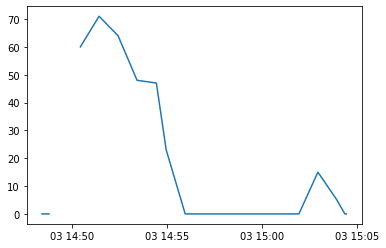

In [77]:
import matplotlib.pyplot as plt 

plt.plot(filtered_df["Zeitstempel"], filtered_df["Geschwindigkeit [km/h]"])

9.108159392789375

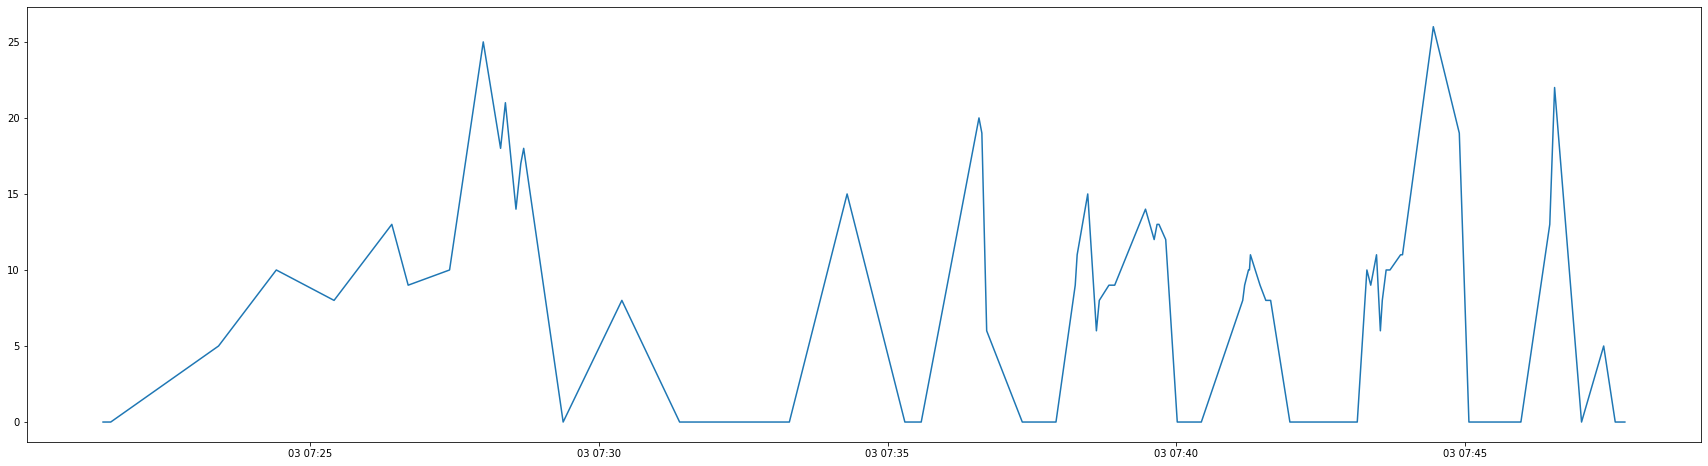

In [78]:
time = drives[5]
filtered_df = data.query("Zeitstempel <= '" + str(time[1]) + "' & Zeitstempel >= '" + str(time[0]) + "'")

# plot the speed 
filtered_df_speed = filtered_df.dropna(subset=["Geschwindigkeit [km/h]"])
plt.figure(figsize=(30, 8))
plt.plot(filtered_df_speed["Zeitstempel"], filtered_df_speed["Geschwindigkeit [km/h]"])

# get the average speed 
time_since = filtered_df.iloc[len(filtered_df) - 1]["Zeitstempel"] - filtered_df.iloc[0]["Zeitstempel"] 
hours = time_since.seconds / 3600
filtered_df_distance = filtered_df.dropna(subset=["Gesamtkilometer [km]"])
driven_kilometers = - filtered_df_distance.iloc[0]["Gesamtkilometer [km]"] + filtered_df_distance.iloc[len(filtered_df_distance) - 1]["Gesamtkilometer [km]"]
average_speed = driven_kilometers / hours
average_speed

In [79]:
# Analyse the View 
filtered_df_view = filtered_df[filtered_df["Eintragstext"].str.contains("Fahrsicht")]

In [80]:
# Find the times where the view was not equal to the gear and the car was moving 
unusual_things_backwards = filtered_df_view[(filtered_df_view["Eintragstext"] == "Fahrsicht 3") & (filtered_df_view["Ganglage (Ist)"].str.contains("V")) & (filtered_df_view["Geschwindigkeit [km/h]"] != 0)]
unusual_things_forwards = filtered_df[((filtered_df["Eintragstext"] == "Fahrsicht 1") | (filtered_df["Eintragstext"] == "Fahrsicht 2")) & (filtered_df["Ganglage (Ist)"].str.contains("R")) & (filtered_df["Geschwindigkeit [km/h]"] != 0)]


In [81]:
data["Ganglage (Ist)"].unique()

array([nan, 'N', '-', '1.V', '4.V', '3.V', '6.V', '2.R', '3.R', '2.V',
       '5.V'], dtype=object)

In [82]:
# How much time was spend in which view 
for view in ["Fahrsicht 1", "Fahrsicht 2", "Fahrsicht 3"]: 	
	speed = False
	active = False
	start_time = None
	time_passed = 0
	for i in range(len(filtered_df_view)): 
		row = filtered_df_view.iloc[i]
		if not active and row["Eintragstext"] == view: 
			active = True
		elif active and row["Eintragstext"] != view and speed: 
			active = False
			time_passed += (row["Zeitstempel"] - start_time).seconds
			if (row["Zeitstempel"] - start_time).seconds > 600: 
				print((row["Zeitstempel"] - start_time).seconds)
				print(start_time)
				print(row["Zeitstempel"])
			start_time = None
		elif active and speed and row["Geschwindigkeit [km/h]"] == 0: 
			active = False
			time_passed += (row["Zeitstempel"] - start_time).seconds
			start_time = None	
		speed = row["Geschwindigkeit [km/h]"] != 0
		if speed and start_time is None and active: 
			start_time = row["Zeitstempel"]
	print(view + " " + str(time_passed / 60))

	# Note to myself 
	# The speed entrys are not in filtered_df_view -> you have to use a different dataframe 

Fahrsicht 1 7.333333333333333
Fahrsicht 2 2.0833333333333335
Fahrsicht 3 0.03333333333333333


In [83]:
# Ermitteln der Abschnitte, in denen jeweils die Kamerasicht verwendet wurde 
views = [[], [], []]

index = 0 
for view in ["Fahrsicht 1", "Fahrsicht 2", "Fahrsicht 3"]: 
	active = False
	start_time = None
	for i in range(len(filtered_df_view) - 1): 
		row = filtered_df_view.iloc[i]
		if row["Eintragstext"] == view and not active: 
			active = True
			start_time = row["Zeitstempel"]
		elif active and row["Eintragstext"] != view: 
			views[index].append((start_time, row["Zeitstempel"]))
			active = False
			start_time = None
	index += 1


(0.0, 2.0)

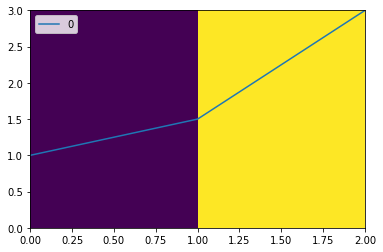

In [84]:
import numpy as np 
ax = pd.DataFrame([1, 1.5, 3]).plot()
x = [[0, 0], [1, 1], [2, 2]]
y = [[0, 3], [0, 3], [0, 3]]
ax.pcolormesh(x, y, [[1], [2]])
ax.get_xlim()

(2, 120) (2, 120)


/var/folders/2v/g7bws9_s3637rbz2t0cz1c7h0000gn/T/ipykernel_75710/4061186128.py:22: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(x, y, [filtered_df["Camera"]], cmap=plt.cm.get_cmap('jet', 3), shading="auto", alpha=0.4)


(2, 120)

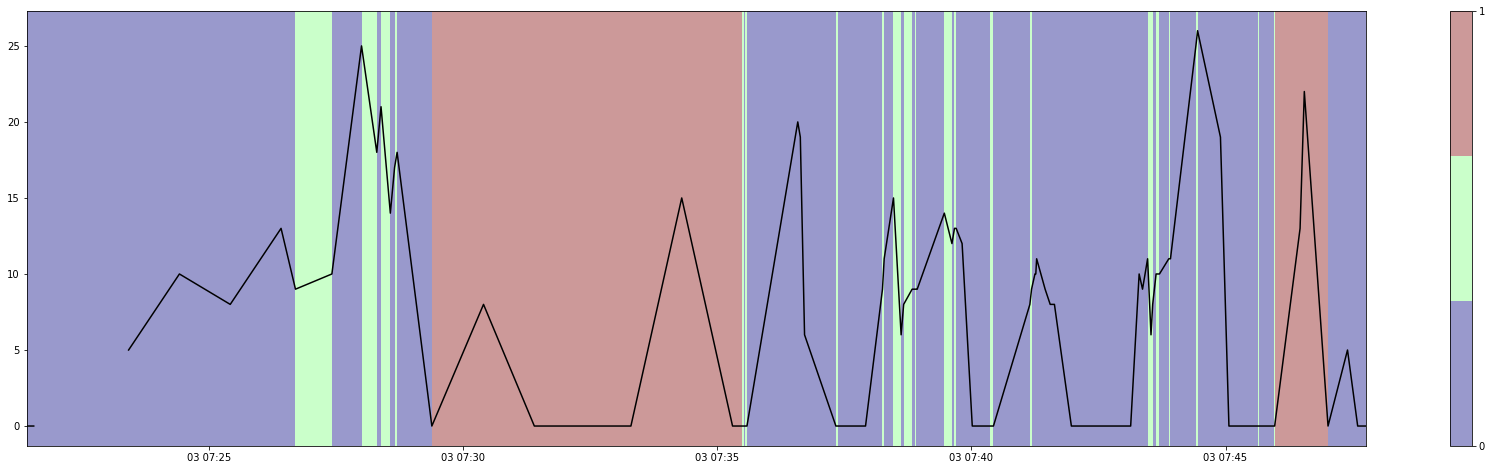

In [85]:
import uuid
import os
# Create the directory 
if not os.path.exists("test"): os.mkdir("test")

fig, ax = plt.subplots(figsize=(30, 8))
plt.plot(filtered_df["Zeitstempel"], filtered_df["Geschwindigkeit [km/h]"], color="black")




x = np.array([ [filtered_df.iloc[i]["Zeitstempel"] for i in range(len(filtered_df)) ], [filtered_df.iloc[i]["Zeitstempel"] for i in range(len(filtered_df)) ]  ])
y = np.array( [[ax.get_ylim()[0] for i in range(len(filtered_df)) ], [ ax.get_ylim()[1] for i in range(len(filtered_df)) ]  ])

# x = np.array(filtered_df["Zeitstempel"])
# y_min = np.repeat(ax.get_ylim()[0], len(filtered_df))
# y_max = np.repeat(ax.get_ylim()[1], len(filtered_df))
# y = np.array([y_min, y_max])
# x = np.array([x, x])

print(x.shape, y.shape)
ax.pcolormesh(x, y, [filtered_df["Camera"]], cmap=plt.cm.get_cmap('jet', 3), shading="auto", alpha=0.4)

plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.get_cmap("jet", 3)), ticks=[0, 1, 2, 3], alpha = 0.4)
name = str(uuid.uuid4()) + ".jpg"
path = "test"
# plt.savefig(os.path.join(path, name), format="jpg", dpi=400)
x.shape

In [86]:
filtered_df[filtered_df["Zeitstempel"] > "2021-03-03 11:00:00"].head()

,Zeitstempel,Eintragstyp,Eintragstext,Warnton taktisch,Warnton technisch,Betriebsart,Einzelpr�fung Fehlerstatus,Ganglage (Ist),Ganglage (Soll),Gesamtkilometer [km],Geschwindigkeit [km/h],HS Fg/BAW Turm,Kampfschalter,Kettenkilometer [km],Knotenfehlernummer,Motorstatus,Motordrehzahl [U/min],Not,Camera


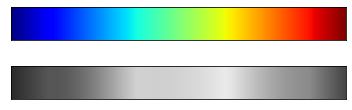

In [87]:
from matplotlib.colors import LinearSegmentedColormap

def grayscale_cmap(cmap):
    """Return a grayscale version of the given colormap"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    # convert RGBA to perceived grayscale luminance
    # cf. http://alienryderflex.com/hsp.html
    RGB_weight = [0.299, 0.587, 0.114]
    luminance = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight))
    colors[:, :3] = luminance[:, np.newaxis]
        
    return LinearSegmentedColormap.from_list(cmap.name + "_gray", colors, cmap.N)
 
def view_colormap(cmap):
    """Plot a colormap with its grayscale equivalent"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    cmap = grayscale_cmap(cmap)
    grayscale = cmap(np.arange(cmap.N))
    
    fig, ax = plt.subplots(2, figsize=(6, 2),
                           subplot_kw=dict(xticks=[], yticks=[]))
    ax[0].imshow([colors], extent=[0, 10, 0, 1])
    ax[1].imshow([grayscale], extent=[0, 10, 0, 1])

view_colormap('jet')

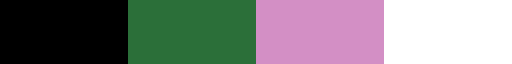

In [88]:
plt.cm.get_cmap("cubehelix", 4)

In [89]:
cmap = plt.cm.get_cmap("jet", 4)  # define the colormap
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]

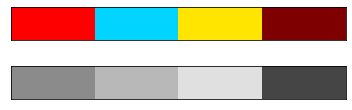

In [90]:
import matplotlib as mpl
cmaplist[0] = (1.0, 0.0, 0.0, 1.0)
cmap = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, cmap.N)
view_colormap(cmap)

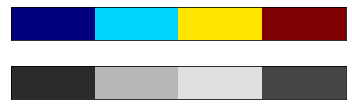

In [91]:
view_colormap(plt.cm.get_cmap("jet", 4))

In [92]:
filtered_df.tail()

,Zeitstempel,Eintragstyp,Eintragstext,Warnton taktisch,Warnton technisch,Betriebsart,Einzelpr�fung Fehlerstatus,Ganglage (Ist),Ganglage (Soll),Gesamtkilometer [km],Geschwindigkeit [km/h],HS Fg/BAW Turm,Kampfschalter,Kettenkilometer [km],Knotenfehlernummer,Motorstatus,Motordrehzahl [U/min],Not,Camera
2486,2021-03-03 07:47:39,WR,624511 Kamera 1 Front links BA151 CAN-Safety-S...,0.0,0.0,F�,NaN,N,N,159.0,0.0,2 / Beobachten,aus,159.0,107.0,luft,1241.0,NaN,1
2487,2021-03-03 07:47:42,H,Bewegung der Heckklappe gestoppt,NaN,NaN,F�,NaN,N,N,159.0,0.0,2 / Beobachten,aus,159.0,NaN,luft,1241.0,NaN,1
2488,2021-03-03 07:47:42,HS,Hauptschalter 1,NaN,NaN,F�,NaN,N,N,159.0,0.0,1 / Beobachten,aus,159.0,NaN,luft,1241.0,NaN,1
2489,2021-03-03 07:47:43,W,624511 Kamera 1 Front links BA151 CAN-Safety-S...,0.0,0.0,F�,NaN,N,N,159.0,0.0,1 / Beobachten,aus,159.0,107.0,luft,245.0,NaN,1
2490,2021-03-03 07:47:46,MSTA,Motorstatus,NaN,NaN,F�,NaN,N,N,159.0,0.0,1 / Beobachten,aus,159.0,NaN,steht,0.0,NaN,1


In [93]:
filtered_df["Camera"].unique()

array([1, 2, 3])

In [94]:
os.path.join("hello", "dude")

'hello/dude'

In [95]:
if not os.path.exists("test"): os.mkdir("test")

In [96]:
for i in range(len(unusual_things_backwards)): 
	row = unusual_things_backwards.iloc[i]
	print("<tr><td>" + str(row["Zeitstempel"]) + "</td><td>" + row["Ganglage (Ist)"] + "</td><td>" + str(row["Geschwindigkeit [km/h]"]) + "</td></tr>")
for i in range(len(unusual_things_forwards)): 
	row = unusual_things_forwards.iloc[i]
	print("<tr><td>" + str(row["Zeitstempel"]) + "</td><td>" + row["Ganglage (Ist)"] + "</td><td>" + str(row["Geschwindigkeit [km/h]"]) + "</td></tr>")

In [97]:
# Figure out the time spend in each Camera 
cameras = [0, 0, 0]
start = filtered_df.iloc[0]["Zeitstempel"]
camera = filtered_df.iloc[0]["Camera"] - 1
for i in range(len(filtered_df)): 
	cam = filtered_df.iloc[i]["Camera"] - 1
	if cam != camera: 
		time_passed = (filtered_df.iloc[i]["Zeitstempel"] - start).seconds
		start = filtered_df.iloc[i]["Zeitstempel"]
		cameras[camera] += time_passed
		camera = cam

[i / 60 for i in cameras]

[16.166666666666668, 2.283333333333333, 7.15]

In [98]:
start_stop_times = data[data["Eintragstyp"] == "MSTA"]
running = False
drives = []
start = None
for i in range(len(start_stop_times)): 
	row = start_stop_times.iloc[i]
	if not running and row["Motorstatus"] == "luft": 
		start = row["Zeitstempel"]
		running = True
	elif running and row["Motorstatus"] == "steht": 
		drives.append((start, row["Zeitstempel"]))
		running = False

In [104]:
filtered_df_errors = filtered_df[(filtered_df["Eintragstext"].str.contains("Kamera")) | (filtered_df["Eintragstext"].str.contains("Video"))]
len(filtered_df_errors)

23

In [105]:
filtered_df_errors["Eintragstext"].unique()

array(['624512 Kamera 2 Front mitte BA152 CAN-Safety-Schnittstelle ohne Funktion',
       '624203 Display MKF BA173 Eingefrorene Videobilder erkannt',
       '624080 Endlagenschalter Scheibenwischer Kamera BS80 unplausibel',
       '624511 Kamera 1 Front links BA151 CAN-Safety-Schnittstelle ohne Funktion'],
      dtype=object)

In [129]:
counts = filtered_df_errors.groupby(["Eintragstext"]).count()
errors = {}
for i in range(len(counts)):
	row = counts.iloc[i]
	errors[row.name] = row["Eintragstyp"]
errors = sorted(errors.items(), key=lambda x:x[1], reverse=True)
errors

[('624512 Kamera 2 Front mitte BA152 CAN-Safety-Schnittstelle ohne Funktion',
  13),
 ('624203 Display MKF BA173 Eingefrorene Videobilder erkannt', 6),
 ('624511 Kamera 1 Front links BA151 CAN-Safety-Schnittstelle ohne Funktion',
  3),
 ('624080 Endlagenschalter Scheibenwischer Kamera BS80 unplausibel', 1)]